In [ ]:
# navigate to the directory of your project in your Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Checking Varaince Scheduler

100%|██████████| 26.4M/26.4M [00:01<00:00, 18.0MB/s]


Extracting FashionMNIST/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 271kB/s]


Extracting FashionMNIST/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:00<00:00, 4.93MB/s]


Extracting FashionMNIST/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 9.07MB/s]


Extracting FashionMNIST/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/FashionMNIST/raw



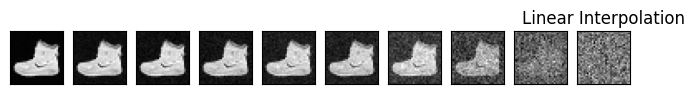

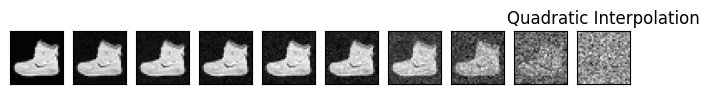

In [ ]:
import torch

import matplotlib.pyplot as plt

from main import load_data
from models import VarianceScheduler


# define the configurations of the Variance Scheduler
beta1 = 0.0001
beta2 = 0.02
num_steps = 1000
interpolation = 'linear'

# sample data
dataset = load_data()
sample_image = dataset[0][0].unsqueeze(0)

time_steps = torch.tensor([0, 10, 20, 30, 40, 50, 100, 200, 500, 999], dtype=torch.long)
sample_image = sample_image.repeat(10, 1, 1, 1)

# define the variance scheduler with linear interpolation
var_scheduler = VarianceScheduler(beta_start=beta1, beta_end=beta2, num_steps=num_steps, interpolation=interpolation)

noisy_samples, _ = var_scheduler.add_noise(sample_image, time_steps)

fig, ax = plt.subplots(1, 10)
fig.set_size_inches(8, 2)
for i in range(10):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow(noisy_samples[i, 0].numpy(), cmap='gray')

plt.title('Linear Interpolation')
plt.show()


# define the variance scheduler with quadratic interpolation
interpolation = 'quadratic'
var_scheduler = VarianceScheduler(beta_start=beta1, beta_end=beta2, num_steps=num_steps, interpolation=interpolation)

noisy_samples, _ = var_scheduler.add_noise(sample_image, time_steps)

fig, ax = plt.subplots(1, 10)
fig.set_size_inches(8, 2)
for i in range(10):
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].imshow(noisy_samples[i, 0].numpy(), cmap='gray')

plt.title('Quadratic Interpolation')
plt.show()

## Training DDPM

In [ ]:
!python main.py --model ddpm --mode train



	 Training DDPM ...
Traceback (most recent call last):
  File "/content/main.py", line 88, in <module>
    trainer(model, train_loader, 
  File "/content/trainers.py", line 40, in train_ddpm_ddim
    loss = diffusion_model(x, label)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
  File "/content/models.py", line 520, in forward
    estimated_noise = self.network(noisy_input, t, label)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
  File "/content/models.py", line 242, in forward
    x = up(x,

## DDPM Image Generation

saves the results in your project directory as "DDPM_generated_samples.png"

In [ ]:
!python main.py --model ddpm --mode generate



	 Generating images using DDPM ...


	 Generated images saved!
Accuracy: 80.00%	 Score: 0.50


## Trainin DDIM

In [ ]:
!python main.py --model ddim --mode train



	 Training DDIM ...
Epoch: 0 - Loss: 0.146 (24.19 sec)



## DDIM Image Generation

saves the results in your project directory as "DDIM_generated_samples.png"

In [ ]:
!python main.py --model ddim --mode generate



	 Generating images using DDIM ...


	 Generated images saved!
Accuracy: 18.00%	 Score: 0.00


## Training VAE

In [ ]:
!python main.py --model vae --mode train



	 Training VAE ...
Epoch: 0 - Recon Loss: 21873.584 - KL Loss: 507.617 - Loss: 22381.201 (18.78sec)



## VAE Image Generation

saves the results in your project directory as "VAE_generated_samples.png"

In [ ]:
!python main.py --model vae --mode generate



	 Generating images using VAE ...


	 Generated images saved!
Accuracy: 88.00%	 Score: 1.00


## Training LDDPM

In [ ]:
!python main.py --model lddpm --mode train



	 Training LDDPM ...
Traceback (most recent call last):
  File "/content/main.py", line 88, in <module>
    trainer(model, train_loader, 
  File "/content/trainers.py", line 149, in train_lddpm
    _, mu, logvar = diffusion_model.vae(x)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1736, in _wrapped_call_impl
    return self._call_impl(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py", line 1747, in _call_impl
    return forward_call(*args, **kwargs)
TypeError: VAE.forward() missing 1 required positional argument: 'label'


## LDDPM Image Generation

saves the results in your project directory as "LDDM_generated_samples.png"

In [ ]:
!python main.py --model lddpm --mode generate